# Data Science and Bussiness Analyst internship @ The Sparks Foundation

# Author : Bhushan L. Shardul

### Task-1 : Prediction using supervised ML

#### Libraries requireds are pandas, numpy, matplotlib.pyplot, seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [5]:
data=pd.read_csv('https://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Finding summary of data

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the distribution of the scores

<function matplotlib.pyplot.show(close=None, block=None)>

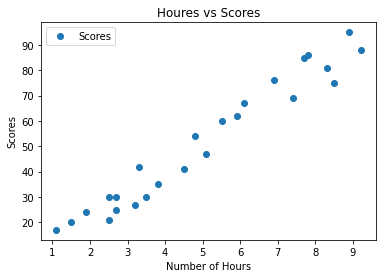

In [7]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Houres vs Scores')
plt.xlabel('Number of Hours studied')
plt.ylabel('Scores')
plt.show

From the above plot we see that there is highely +ve correlation between number of hours studied and the expected score. Also, there is linear relationship between these two variables.

In [8]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

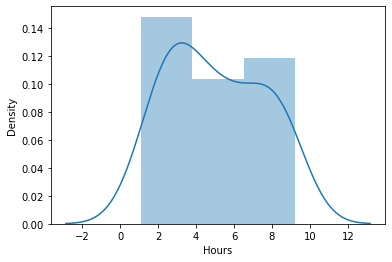

In [12]:
hours=data['Hours']
scores=data['Scores']
sns.distplot(hours)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

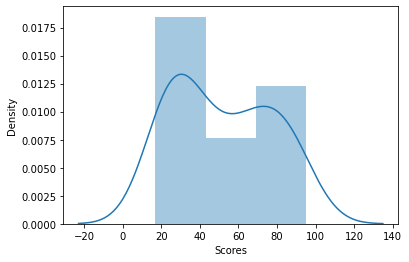

In [13]:
sns.distplot(scores)

### Simple Linear Regression

In [20]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [15]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [16]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Splitting dataset into the Training set and Test set

Here, we use Scikit-Learn's built-in train_test_split() method.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [27]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Training the simple linear regression model on the training set

In [29]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

#### Predicting the Test set results

In [30]:
y_pred=regressor.predict(x_test)

#### Visualising the Training set results

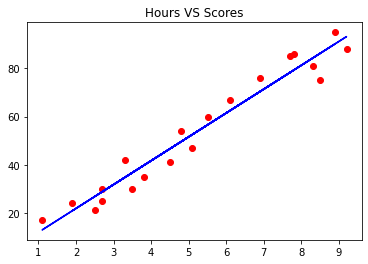

In [39]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Hours VS Scores')
plt.show()

#### Comparing Actual  values VS Predicted values

In [40]:
df=pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})
df

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predict the score if a students studies 9.25 hrs/day.

In [45]:
hr=9.25
score=regressor.predict([[hr]])
print("If a student studies {} hours per day he/she will score {}%.".format(hr,score))

If a student studies 9.25 hours per day he/she will score [93.69173249]%.
